In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#get the size of dataframe
df.shape

(5110, 12)

There are 5110 rows and 12 columns in the dataset.

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Observation:

*   id, hypertension, heart_disease and stroke are of int datatype.   
*   gender, ever_married, work_type, Residence_type and smoking_status are of
    object datatype.
*   age, avg_glucose_level and bmi are of float datatype.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observation: Only bmi column has certain missing values.

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There is 201 null value in bmi

In [ ]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df.isnull().sum()

median of bmi 28.1


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

There are no duplicate rows

Dropping column 'id' as it can cause unwanted correlation.

In [ ]:
df = df.drop(['id'],axis=1)

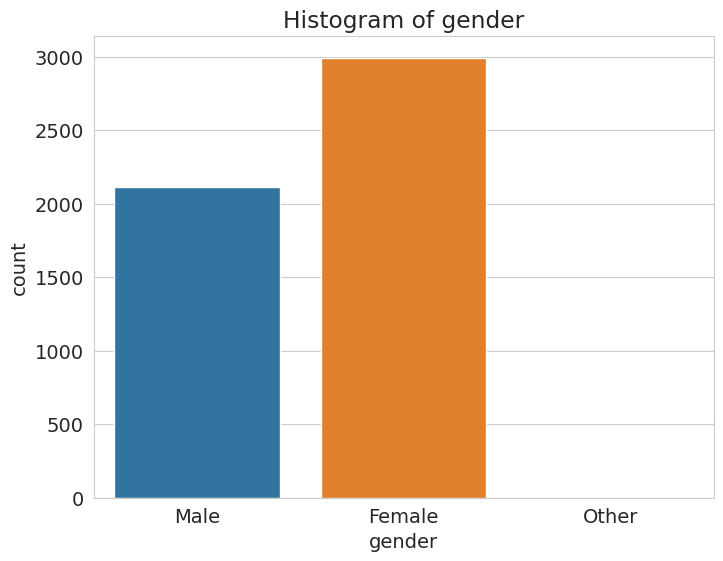

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of gender")
sns.countplot(x='gender', data=df)
plt.show()

In [ ]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')

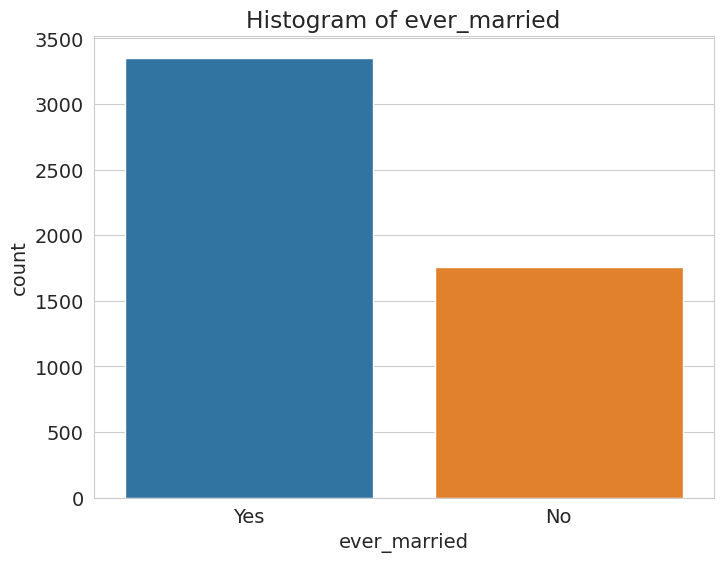

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of ever_married")
sns.countplot(x='ever_married', data=df)
plt.show()

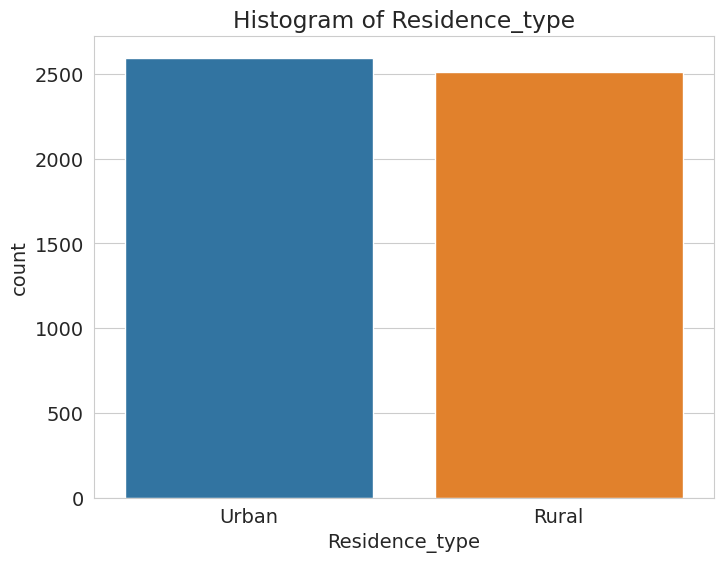

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Residence_type")
sns.countplot(x='Residence_type', data=df)
plt.show()

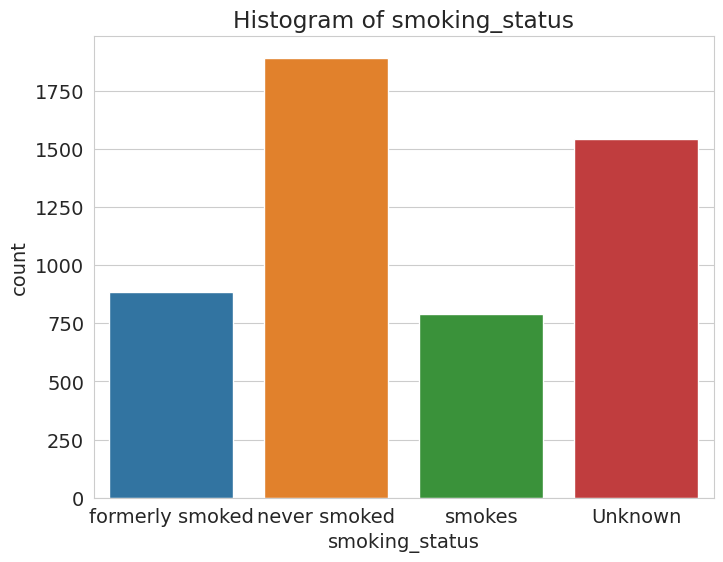

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of smoking_status")
sns.countplot(x='smoking_status', data=df)
plt.show()

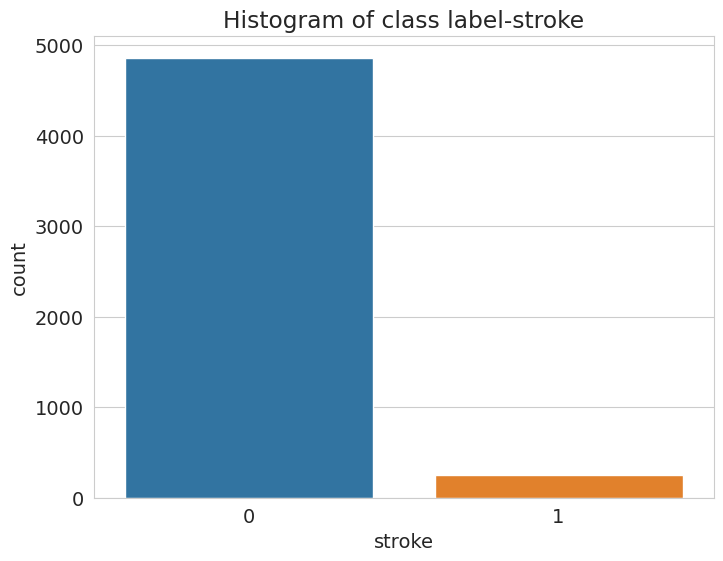

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of class label-stroke")
sns.countplot(x='stroke', data=df)
plt.show()

BOXPLOT

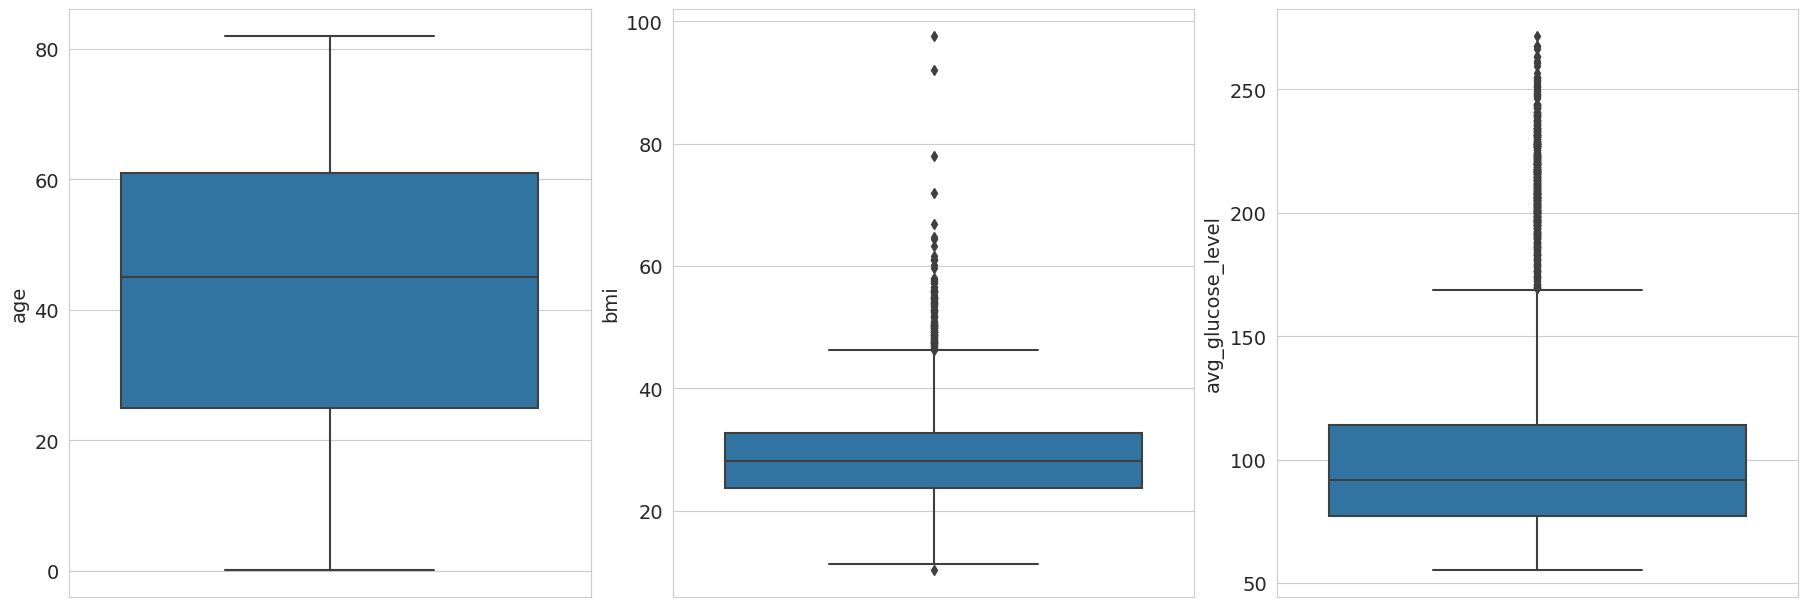

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(18,6))
hg=df[['age','bmi','avg_glucose_level']]
index=0
ax=ax.flatten()
for col,value in hg.items():
  sns.boxplot(y=col,data=hg,ax=ax[index])
  index +=1
plt.tight_layout(pad=0.3,w_pad=0.5,h_pad=5.0)

there are no outliers in age. bmi and avg_glucose_level contains outliers.

COUNT FOR OUTLIERS

In [ ]:
numerical_features = ['age', 'bmi','avg_glucose_level']

# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
age                    0
bmi                  126
avg_glucose_level    627
dtype: int64


observation:

* There are no outliers in age.
* There are 126 outliers in bmi and 627 outliers in avg_glucose_level.

REMOVING OUTLIERS

In [ ]:
# Calculate Q1 and Q3 for each column
Q1 = df[['age', 'bmi','avg_glucose_level']].quantile(0.25)

Q3 = df[['age', 'bmi','avg_glucose_level']].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from specific columns
df_no_outliers = df[
    (df['bmi'] >= lower_bound['bmi']) & (df['bmi'] <= upper_bound['bmi']) &
    (df['avg_glucose_level'] >= lower_bound['avg_glucose_level']) & (df['avg_glucose_level'] <= upper_bound['avg_glucose_level'])
]

# Print the shape of the new dataframe without outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)

Shape of DataFrame after removing outliers: (4391, 11)


after removing outliers dataset contains 4391 instances and 11 attributes.

COUNT AFTER REMOVING OUTLIERS

In [ ]:
numerical_features = ['age', 'bmi','avg_glucose_level']

# Calculate IQR for each numerical feature
Q1 = df_no_outliers[numerical_features].quantile(0.25)
Q3 = df_no_outliers[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df_no_outliers[numerical_features] < lower_bound) | (df_no_outliers[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
age                    0
bmi                   23
avg_glucose_level    120
dtype: int64



*  outliers of bmi reduced from 126 to 23.
*  outliers of avg_glucose_level reduced from 627 to 120.



In [ ]:
df.shape

(5110, 11)

BOXPLOT AFTER REMOVING OUTLIERS

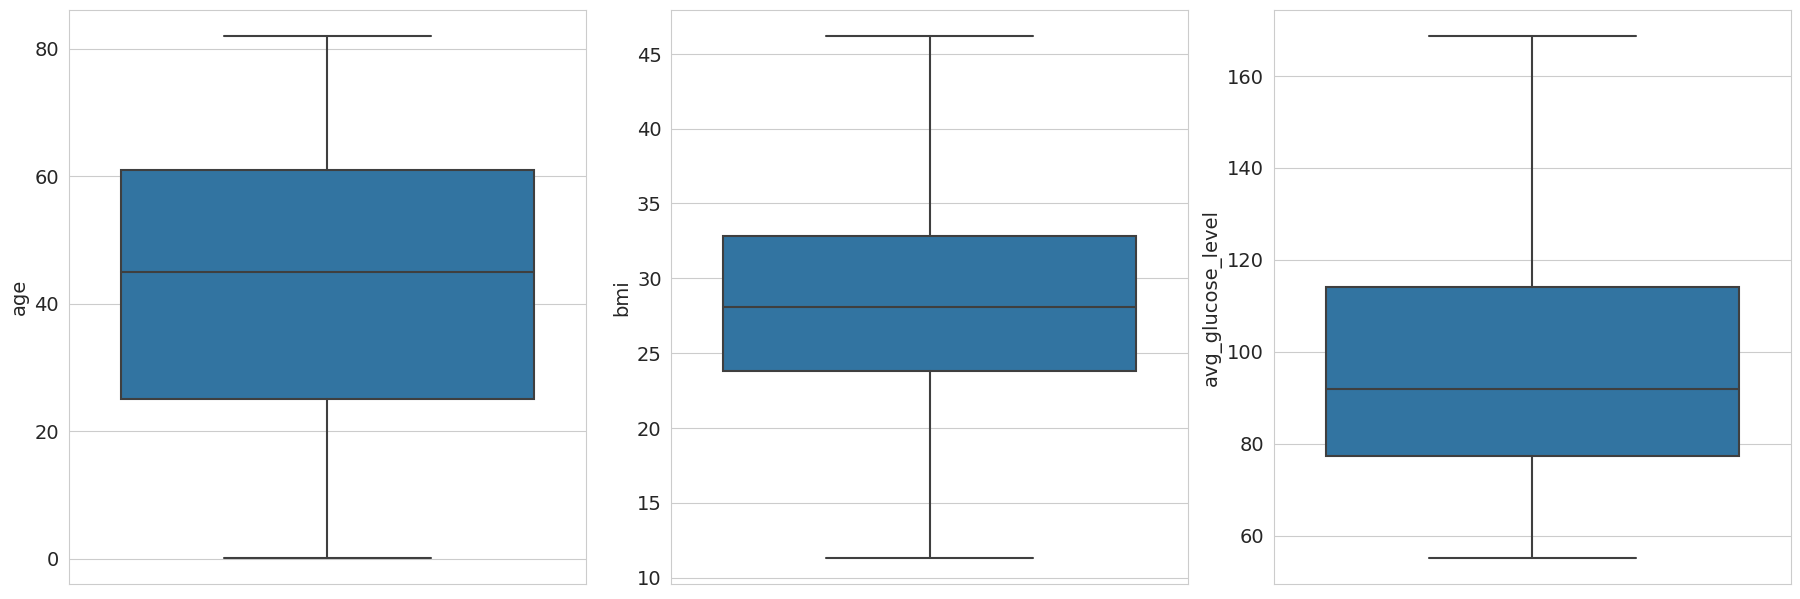

In [ ]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(18,6))
index=0
ax=ax.flatten()
for col,value in hg.items():
  sns.boxplot(y=col,data=hg,ax=ax[index],showfliers=False)
  index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

CONVERTING THE CATEGORICAL VALUES INTO NUMERICAL VALUES USING LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.2,0,0


BALANCING THE CLASS LABEL-STROKE

In [ ]:
# Since our Dataset is highly undersampled over sampling method is done to have equal representation of both the target classes
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

FEATURE SCALING

In [ ]:
# Scaling the numeric attributes
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1


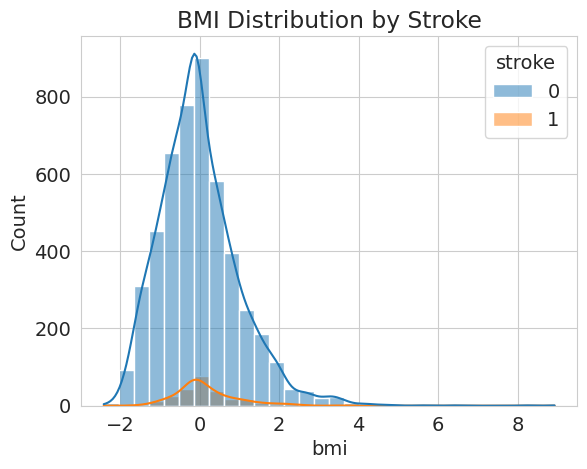

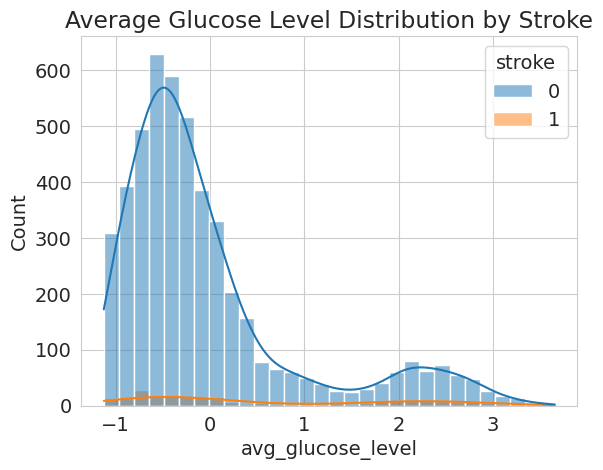

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30)
plt.title('BMI Distribution by Stroke')
plt.show()

sns.histplot(data=df, x='avg_glucose_level', hue='stroke', kde=True, bins=30)
plt.title('Average Glucose Level Distribution by Stroke')
plt.show()

SPLITTING DATASET

In [ ]:
# creating dataset split for training and testing the modeld
from sklearn.model_selection import train_test_split
# Performing a 70-30 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.30, random_state= 38)

In [ ]:
# Checking the size
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (6805, 10)
y_train: (6805,)
X_test: (2917, 10)
y_test: (2917,)


In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3561,1,27.0,0,0,0,0,0,65.12,41.1,3
6350,0,55.0,1,1,1,2,1,210.40,40.0,3
9678,0,68.0,1,1,1,2,1,247.51,40.5,1
7905,1,59.0,0,0,1,2,0,211.78,28.1,1
4074,0,70.0,0,0,1,0,0,158.33,33.5,2
...,...,...,...,...,...,...,...,...,...,...
1643,1,54.0,0,0,1,2,0,109.51,29.0,2
7956,1,49.0,0,0,0,2,0,104.86,31.9,3
763,0,20.0,0,0,1,2,1,79.08,41.2,2
8617,0,65.0,0,0,1,2,0,100.98,28.2,1


RANDOM FOREST

In [ ]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the classifier object
rf_clf = RandomForestClassifier()

In [ ]:
# Train the model using the training sets
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test,y_pred_rf)

In [ ]:
ac_rf

0.9890298251628385

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1494
           1       0.98      1.00      0.99      1423

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



SUPPORT VECTOR MACHINE

In [ ]:
#SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_sv=svm_model.predict(X_test)

In [ ]:
accuracy_svm=accuracy_score(y_test,y_pred_sv)

In [ ]:
accuracy_svm

0.7517997943092218

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1494
           1       0.72      0.81      0.76      1423

    accuracy                           0.75      2917
   macro avg       0.76      0.75      0.75      2917
weighted avg       0.76      0.75      0.75      2917



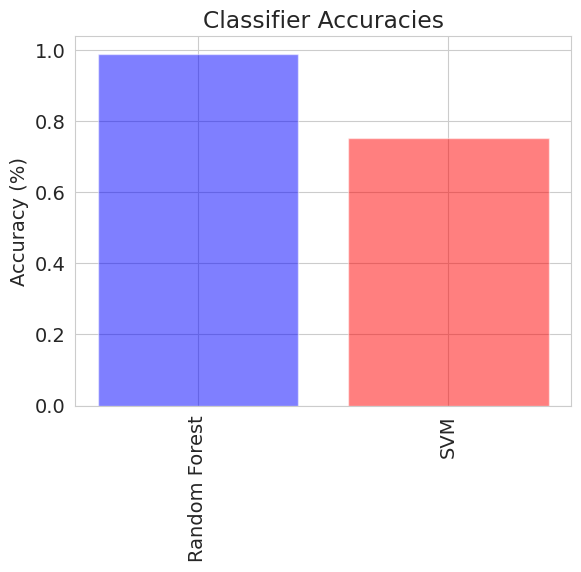

In [ ]:
# visualizing accuracies
predictors_group = ('Random Forest', 'SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [ac_rf, accuracy_svm ]
colors = ['b','r']
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color=colors)
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

CONFUSION MATRIX

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
X_train_prediction=rf_clf.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_prediction)


In [ ]:
X_test_prediction=rf_clf.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)

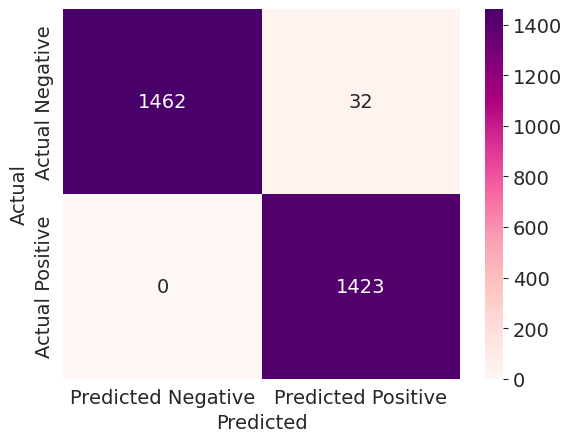

[[1462   32]
 [   0 1423]]


In [ ]:
true_labels=y_test
predicted_labels=X_test_prediction
confusion=confusion_matrix(true_labels,predicted_labels)
sns.heatmap(confusion, annot=True, fmt="d", cmap="RdPu", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(confusion)

SAVING THE MODEL

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_clf,'model0.pkl')

['model0.pkl']

In [ ]:
model = joblib.load('model0.pkl')

In [ ]:
model.predict([[0,49.0,0,0,1,2,1,171.23,34.4,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict([[0,35.0,0,0,1,3,0,82.99,30.6,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Making sample predictions based on manual value entry
gender = 0
age = 44.0
hypertension = 0
heart_disease = 0
ever_married = 1
work_type = 0
Residence_type = 1
avg_glucose_level = 85.28
bmi = 26.2
smoking_status = 0

# Create a dictionary with the input features
input_features = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [Residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}

# Create a DataFrame from the input features
df = pd.DataFrame(input_features)

# Make a prediction using the Random Forest classifier
prediction = rf_clf.predict(df)

# Check the prediction result
if prediction[0] == 1:
    print("The model predicts that the individual is at risk of stroke.")
else:
    print("The model predicts that the individual is not at risk of stroke.")


The model predicts that the individual is not at risk of stroke.


In [ ]:
# Making sample predictions based on manual value entry 0	49.0	0	0	1	2	1	171.23	34.4	3	1
gender = 0
age = 49.0
hypertension = 0
heart_disease = 0
ever_married = 1
work_type = 2
Residence_type = 1
avg_glucose_level = 171.23
bmi = 34.4
smoking_status = 3

# Create a dictionary with the input features
input_features = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [Residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}

# Create a DataFrame from the input features
df = pd.DataFrame(input_features)

# Make a prediction using the Random Forest classifier
prediction = rf_clf.predict(df)

# Check the prediction result
if prediction[0] == 1:
    print("The model predicts that the individual is at risk of stroke.")
else:
    print("The model predicts that the individual is not at risk of stroke.")


The model predicts that the individual is at risk of stroke.


In [ ]:
import pickle
pickle.dump(model, open("model0.pkl", "wb"))

In [ ]:
from google.colab import files

files.download('model0.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Making sample predictions based on manual value entry 0	49.0	0	0	1	2	1	171.23	34.4	3	1
gender = 1
age = 49
hypertension = 1
heart_disease = 1
ever_married = 1
work_type = 2
Residence_type = 1
avg_glucose_level = 171.23
bmi = 34.4
smoking_status = 3

# Create a dictionary with the input features
input_features = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [Residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}

# Create a DataFrame from the input features
df = pd.DataFrame(input_features)

# Make a prediction using the Random Forest classifier
prediction = rf_clf.predict(df)

# Check the prediction result
if prediction[0] == 1:
    print("The model predicts that the individual is at risk of stroke.")
else:
    print("The model predicts that the individual is not at risk of stroke.")
